Importing necessary libraries for plotting and computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Question 1

Defining functions for the following tasks :-

1. "generate_n_armed_bandit_task" - generates an n-armed bandit. Takes as input the parameters n (no. of arms), mean (mean of the normal distribution of the expected value of the arms), std_dev (standard deviation of the normal distribution of the expected value of the arms).

2. "greedy_bandit" - Takes as input a bandit, and the no. of iterations. Runs the greedy approach to action selection on the input bandit. Returns the list of actions taken, the list of rewards received, the total reward and the list of sum of Q errors for all the arms at each step.

3. "e_greedy" - Takes as input a bandit, the no. of iterations, and the value of e ([0,1]). Runs the e-greedy approach to action selection on the input bandit. Returns the list of actions taken, the list of rewards received, the total reward and the list of sum of Q errors for all the arms at each time step.

In [27]:
def generate_n_armed_bandit_task(n, mean, std_dev):
    bandit_arms = np.random.normal(mean, std_dev, n)
    return bandit_arms

def greedy_bandit(bandit_arms, steps):
    action_list = []
    reward_list = []
    Q_list = [0 for _ in range(len(bandit_arms))]
    counts = [0 for _ in range(len(bandit_arms))]
    Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
    error = [np.sum(Q_error)]

    for i in range(steps):
        chosen_arm = Q_list.index(max(Q_list))
        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)

        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]
        Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
        error.append(np.sum(Q_error))

        action_list.append(chosen_arm)
        reward_list.append(reward)

    sum_reward = np.sum(reward_list)
    return action_list, reward_list, sum_reward, error


def e_decay(bandit_arms, steps):
    action_list = []
    reward_list = []
    Q_list = [0 for _ in range(len(bandit_arms))]
    counts = [0 for _ in range(len(bandit_arms))]
    Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
    error = [np.sum(Q_error)]
    
    for i in range(steps):
        e = 1/(i+1)
        sample = np.random.binomial(1, 1 - e, 1)[0]
        
        if sample == 1:
            chosen_arm = Q_list.index(max(Q_list))
        else:
            chosen_arm = np.random.randint(0, len(bandit_arms))

        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)

        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]
        Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
        error.append(np.sum(Q_error))

        action_list.append(chosen_arm)
        reward_list.append(reward)

    sum_reward = np.sum(reward_list)
    return action_list, reward_list, sum_reward, error
        
        

def e_greedy(bandit_arms, steps, e):
    samples = np.random.binomial(1, 1 - e, steps)
    action_list = []
    reward_list = []
    Q_list = [0 for _ in range(len(bandit_arms))]
    counts = [0 for _ in range(len(bandit_arms))]
    Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
    error = [np.sum(Q_error)]

    for i in range(steps):
        sample = samples[i]
        if samples[i] == 1:
            chosen_arm = Q_list.index(max(Q_list))
        else:
            chosen_arm = np.random.randint(0, len(bandit_arms))

        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)

        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]
        Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
        error.append(np.sum(Q_error))

        action_list.append(chosen_arm)
        reward_list.append(reward)

    sum_reward = np.sum(reward_list)
    return action_list, reward_list, sum_reward, error


def ucb(bandit_arms, steps, c):
    action_list = []
    reward_list = []
    Q_list = [0 for _ in range(len(bandit_arms))]
    counts = [0 for _ in range(len(bandit_arms))]
    Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
    error = [np.sum(Q_error)]

    for i in range(len(bandit_arms)):
        chosen_arm = i
        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)
        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]
        Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
        error.append(np.sum(Q_error))
        action_list.append(chosen_arm)
        reward_list.append(reward)
    
    for i in range(steps - len(bandit_arms)):
        ucb_values = [Q_list[j] + (c*math.sqrt(math.log(i+1)/counts[j])) for j in range(len(bandit_arms))]
        chosen_arm = ucb_values.index(max(ucb_values))
        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)

        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]
        Q_error = [abs(a - b) for a, b in zip(bandit_arms, Q_list)]
        error.append(np.sum(Q_error))
        
        action_list.append(chosen_arm)
        reward_list.append(reward)
        
    sum_reward = np.sum(reward_list)
    return action_list, reward_list, sum_reward, error

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum(axis=0)

def gradient_ascent(bandit_arms, steps, alpha, take_baseline):
    action_list = []
    reward_list = []
    H_list = [0 for _ in range(len(bandit_arms))]
    outcomes = np.arange(len(bandit_arms))
    baseline = 0
    
    for i in range(steps):
        prob_list = softmax(np.array(H_list))
        chosen_arm = np.random.choice(outcomes, p=prob_list)
        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)
        
        reward_list.append(reward)
        if len(reward_list) != 0:
            baseline = sum(reward_list) / len(reward_list)
        
        for j in range(len(bandit_arms)):
            if j == chosen_arm:
                H_list[j] += alpha * (reward - baseline if take_baseline else reward) * (1 - prob_list[j])
            else:
                H_list[j] -= alpha * (reward - baseline if take_baseline else reward) * prob_list[j]
                
        action_list.append(chosen_arm)

    sum_reward = np.sum(reward_list)
    return action_list, reward_list, sum_reward

Iterates 2000 times, each time generating a new bandit, running the greedy, e-greedy (e = 0.01), and e-greedy (e = 0.1) approaches. 
- Average rewards at each time step is plotted for each approach. 
- Similarly, the average % of choosing the optimal action at a given time step is also shown in another graph. 
- The third graph shows the average sum of Q errors at each time step for all the three approaches.

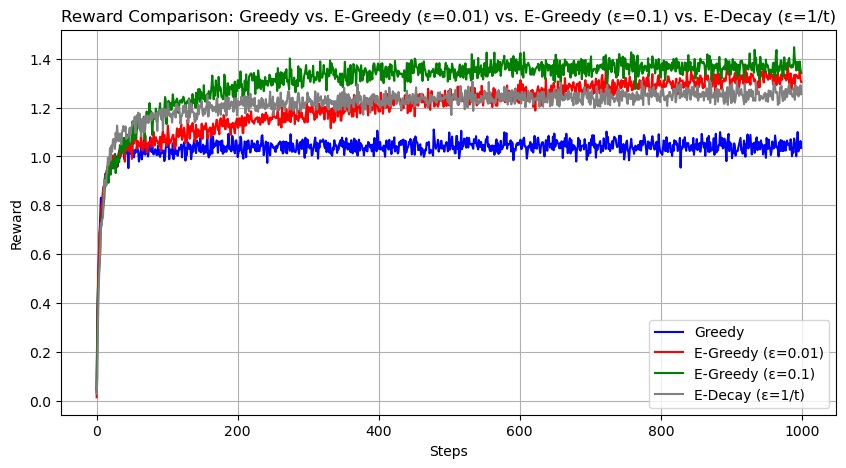

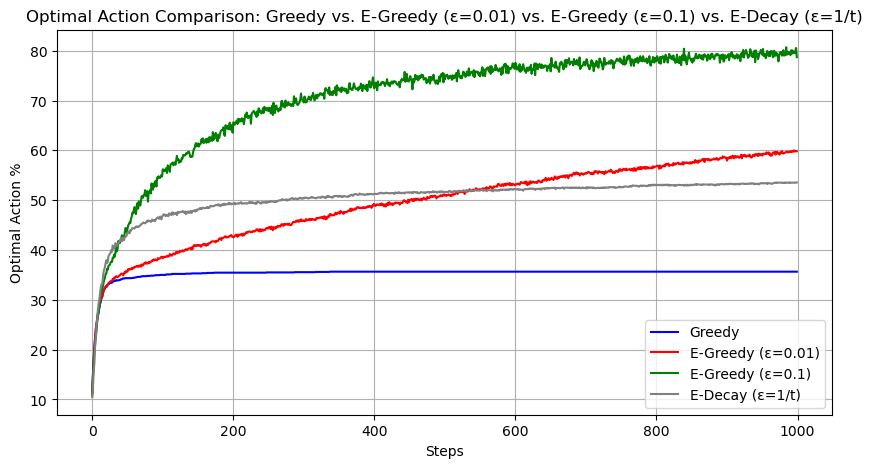

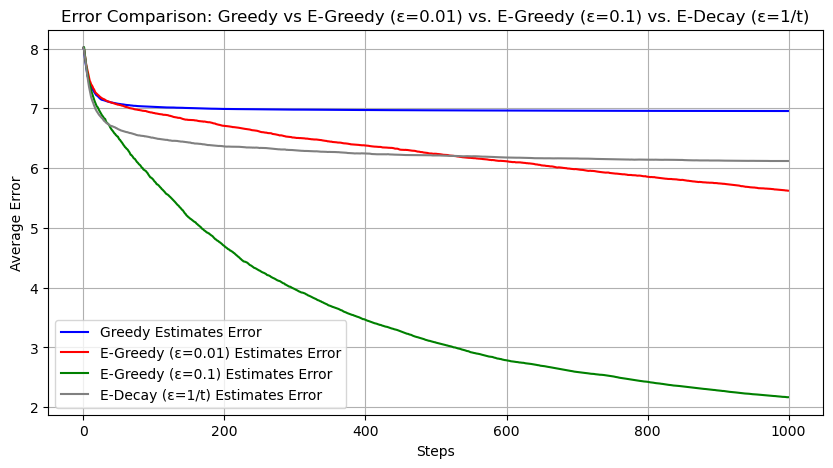

In [29]:
reward_list_greedy = [0 for _ in range(1000)]
optimal_action_greedy = [0 for _ in range(1000)]
error_list_greedy = [0 for _ in range(1000)]

reward_list_e_greedy = [0 for _ in range(1000)]
optimal_action_e_greedy = [0 for _ in range(1000)]
error_list_e_greedy = [0 for _ in range(1000)]

reward_list_e_greedy_ = [0 for _ in range(1000)]
optimal_action_e_greedy_ = [0 for _ in range(1000)]
error_list_e_greedy_ = [0 for _ in range(1000)]

reward_list_e_decay = [0 for _ in range(1000)]
optimal_action_e_decay = [0 for _ in range(1000)]
error_list_e_decay = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 0, 1)

    optimal_action = np.argmax(bandit)

    greedy_bandit_result = greedy_bandit(bandit, 1000)
    reward_list_greedy = [a + b for a, b in zip(reward_list_greedy, greedy_bandit_result[1])]
    for j in range(len(greedy_bandit_result[0])):
        if greedy_bandit_result[0][j] == optimal_action:
            optimal_action_greedy[j] += 1
    error_list_greedy = [(a + b) for a, b in zip(error_list_greedy, greedy_bandit_result[3])]

    e_greedy_bandit_result = e_greedy(bandit, 1000, 0.01)
    reward_list_e_greedy = [a + b for a, b in zip(reward_list_e_greedy, e_greedy_bandit_result[1])]
    for j in range(len(e_greedy_bandit_result[0])):
        if e_greedy_bandit_result[0][j] == optimal_action:
            optimal_action_e_greedy[j] += 1
    error_list_e_greedy = [(a + b) for a, b in zip(error_list_e_greedy, e_greedy_bandit_result[3])]
    
    e_greedy_bandit_result_ = e_greedy(bandit, 1000, 0.1)
    reward_list_e_greedy_ = [a + b for a, b in zip(reward_list_e_greedy_, e_greedy_bandit_result_[1])]
    for j in range(len(e_greedy_bandit_result_[0])):
        if e_greedy_bandit_result_[0][j] == optimal_action:
            optimal_action_e_greedy_[j] += 1
    error_list_e_greedy_ = [(a + b) for a, b in zip(error_list_e_greedy_, e_greedy_bandit_result_[3])]
    
    e_decay_bandit_result = e_decay(bandit, 1000)
    reward_list_e_decay = [a + b for a, b in zip(reward_list_e_decay, e_decay_bandit_result[1])]
    for j in range(len(e_decay_bandit_result[0])):
        if e_decay_bandit_result[0][j] == optimal_action:
            optimal_action_e_decay[j] += 1
    error_list_e_decay = [(a + b) for a, b in zip(error_list_e_decay, e_decay_bandit_result[3])]
    
reward_list_greedy = [x/2000 for x in reward_list_greedy]
optimal_action_greedy = [x/20 for x in optimal_action_greedy]
reward_list_e_greedy = [x / 2000 for x in reward_list_e_greedy]
optimal_action_e_greedy = [x / 20 for x in optimal_action_e_greedy]
reward_list_e_greedy_ = [x / 2000 for x in reward_list_e_greedy_]
optimal_action_e_greedy_ = [x / 20 for x in optimal_action_e_greedy_]
reward_list_e_decay = [x / 2000 for x in reward_list_e_decay]
optimal_action_e_decay = [x / 20 for x in optimal_action_e_decay]

error_list_greedy = [x/2000 for x in error_list_greedy]
error_list_e_greedy = [x/2000 for x in error_list_e_greedy]
error_list_e_greedy_ = [x/2000 for x in error_list_e_greedy_]
error_list_e_decay = [x/2000 for x in error_list_e_decay]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_greedy, color='blue', label='Greedy')
plt.plot(reward_list_e_greedy, color='red', label='E-Greedy (ε=0.01)')
plt.plot(reward_list_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(reward_list_e_decay, color='grey', label='E-Decay (ε=1/t)')
plt.title('Reward Comparison: Greedy vs. E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(optimal_action_greedy, color='blue', label='Greedy')
plt.plot(optimal_action_e_greedy, color='red', label='E-Greedy (ε=0.01)')
plt.plot(optimal_action_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(optimal_action_e_decay, color='grey', label='E-Decay (ε=1/t)')
plt.title('Optimal Action Comparison: Greedy vs. E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(error_list_greedy, color='blue', label='Greedy Estimates Error')
plt.plot(error_list_e_greedy, color='red', label='E-Greedy (ε=0.01) Estimates Error')
plt.plot(error_list_e_greedy_, color='green', label='E-Greedy (ε=0.1) Estimates Error')
plt.plot(error_list_e_decay, color='grey', label='E-Decay (ε=1/t) Estimates Error')
plt.title('Error Comparison: Greedy vs E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Average Error')
plt.legend()
plt.grid(True)
plt.show()

Q2

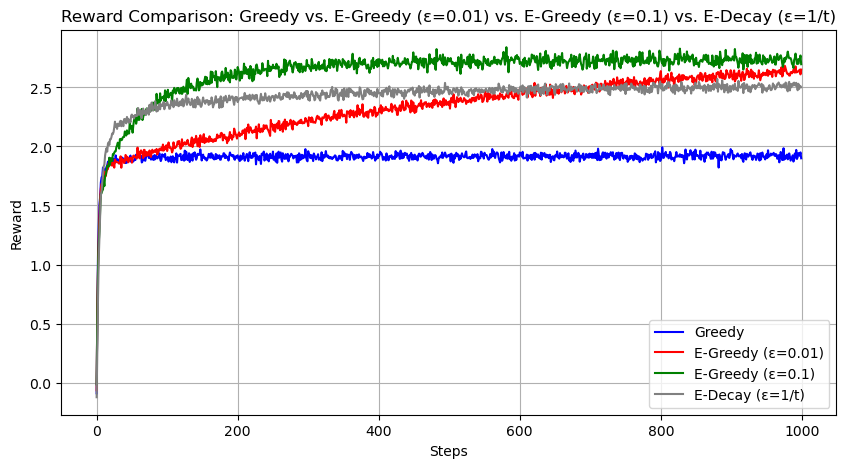

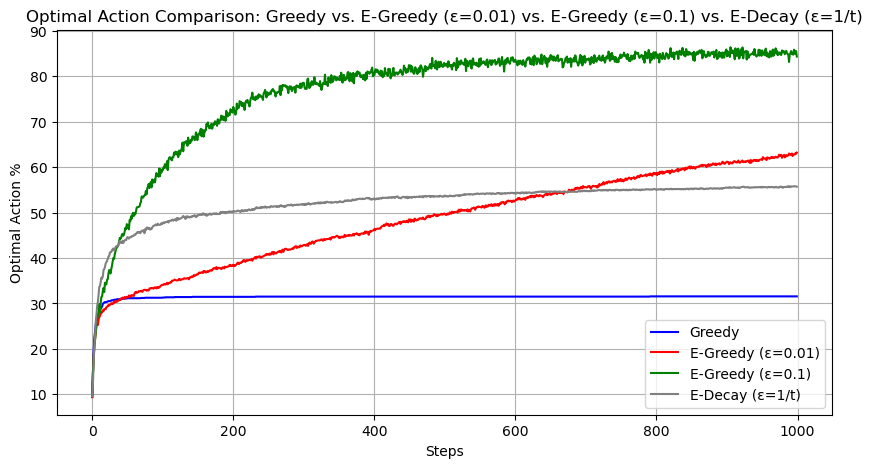

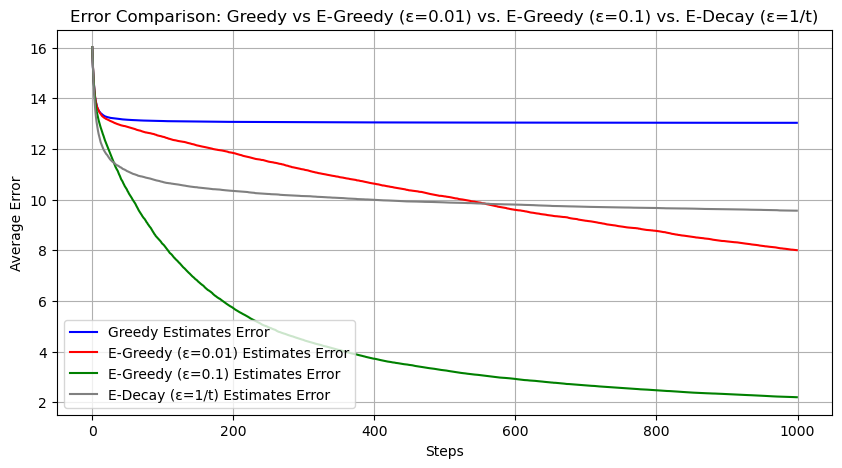

In [30]:
reward_list_greedy = [0 for _ in range(1000)]
optimal_action_greedy = [0 for _ in range(1000)]
error_list_greedy = [0 for _ in range(1000)]

reward_list_e_greedy = [0 for _ in range(1000)]
optimal_action_e_greedy = [0 for _ in range(1000)]
error_list_e_greedy = [0 for _ in range(1000)]

reward_list_e_greedy_ = [0 for _ in range(1000)]
optimal_action_e_greedy_ = [0 for _ in range(1000)]
error_list_e_greedy_ = [0 for _ in range(1000)]

reward_list_e_decay = [0 for _ in range(1000)]
optimal_action_e_decay = [0 for _ in range(1000)]
error_list_e_decay = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 0, 2)

    optimal_action = np.argmax(bandit)

    greedy_bandit_result = greedy_bandit(bandit, 1000)
    reward_list_greedy = [a + b for a, b in zip(reward_list_greedy, greedy_bandit_result[1])]
    for j in range(len(greedy_bandit_result[0])):
        if greedy_bandit_result[0][j] == optimal_action:
            optimal_action_greedy[j] += 1
    error_list_greedy = [(a + b) for a, b in zip(error_list_greedy, greedy_bandit_result[3])]

    e_greedy_bandit_result = e_greedy(bandit, 1000, 0.01)
    reward_list_e_greedy = [a + b for a, b in zip(reward_list_e_greedy, e_greedy_bandit_result[1])]
    for j in range(len(e_greedy_bandit_result[0])):
        if e_greedy_bandit_result[0][j] == optimal_action:
            optimal_action_e_greedy[j] += 1
    error_list_e_greedy = [(a + b) for a, b in zip(error_list_e_greedy, e_greedy_bandit_result[3])]
    
    e_greedy_bandit_result_ = e_greedy(bandit, 1000, 0.1)
    reward_list_e_greedy_ = [a + b for a, b in zip(reward_list_e_greedy_, e_greedy_bandit_result_[1])]
    for j in range(len(e_greedy_bandit_result_[0])):
        if e_greedy_bandit_result_[0][j] == optimal_action:
            optimal_action_e_greedy_[j] += 1
    error_list_e_greedy_ = [(a + b) for a, b in zip(error_list_e_greedy_, e_greedy_bandit_result_[3])]
    
    e_decay_bandit_result = e_decay(bandit, 1000)
    reward_list_e_decay = [a + b for a, b in zip(reward_list_e_decay, e_decay_bandit_result[1])]
    for j in range(len(e_decay_bandit_result[0])):
        if e_decay_bandit_result[0][j] == optimal_action:
            optimal_action_e_decay[j] += 1
    error_list_e_decay = [(a + b) for a, b in zip(error_list_e_decay, e_decay_bandit_result[3])]
    
reward_list_greedy = [x/2000 for x in reward_list_greedy]
optimal_action_greedy = [x/20 for x in optimal_action_greedy]
reward_list_e_greedy = [x / 2000 for x in reward_list_e_greedy]
optimal_action_e_greedy = [x / 20 for x in optimal_action_e_greedy]
reward_list_e_greedy_ = [x / 2000 for x in reward_list_e_greedy_]
optimal_action_e_greedy_ = [x / 20 for x in optimal_action_e_greedy_]
reward_list_e_decay = [x / 2000 for x in reward_list_e_decay]
optimal_action_e_decay = [x / 20 for x in optimal_action_e_decay]

error_list_greedy = [x/2000 for x in error_list_greedy]
error_list_e_greedy = [x/2000 for x in error_list_e_greedy]
error_list_e_greedy_ = [x/2000 for x in error_list_e_greedy_]
error_list_e_decay = [x/2000 for x in error_list_e_decay]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_greedy, color='blue', label='Greedy')
plt.plot(reward_list_e_greedy, color='red', label='E-Greedy (ε=0.01)')
plt.plot(reward_list_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(reward_list_e_decay, color='grey', label='E-Decay (ε=1/t)')
plt.title('Reward Comparison: Greedy vs. E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(optimal_action_greedy, color='blue', label='Greedy')
plt.plot(optimal_action_e_greedy, color='red', label='E-Greedy (ε=0.01)')
plt.plot(optimal_action_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(optimal_action_e_decay, color='grey', label='E-Decay (ε=1/t)')
plt.title('Optimal Action Comparison: Greedy vs. E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(error_list_greedy, color='blue', label='Greedy Estimates Error')
plt.plot(error_list_e_greedy, color='red', label='E-Greedy (ε=0.01) Estimates Error')
plt.plot(error_list_e_greedy_, color='green', label='E-Greedy (ε=0.1) Estimates Error')
plt.plot(error_list_e_decay, color='grey', label='E-Decay (ε=1/t) Estimates Error')
plt.title('Error Comparison: Greedy vs E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1) vs. E-Decay (ε=1/t)')
plt.xlabel('Steps')
plt.ylabel('Average Error')
plt.legend()
plt.grid(True)
plt.show()

Q5

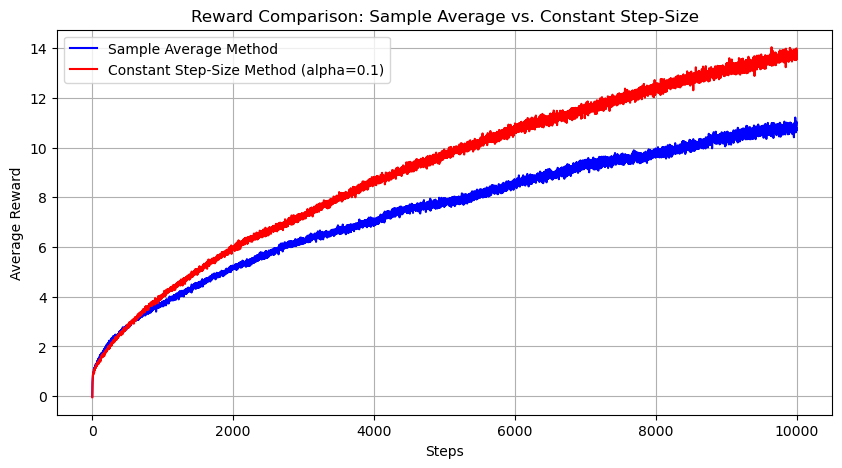

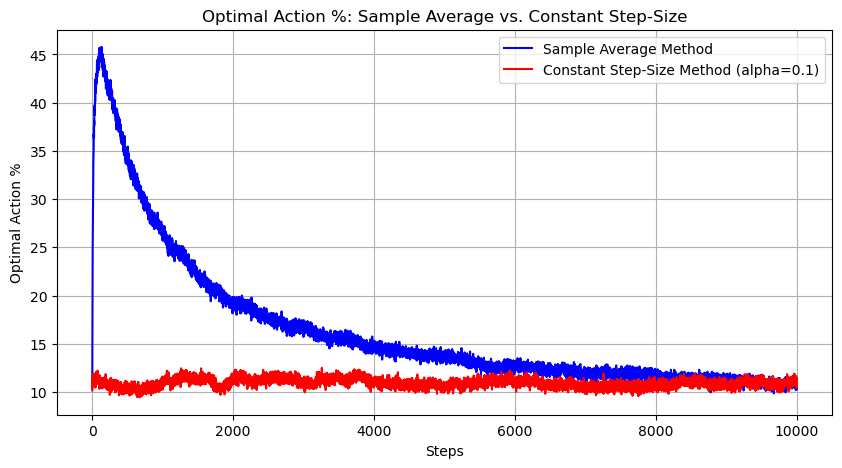

In [33]:
def random_walk(bandit_arms, std_dev=0.1):
    return bandit_arms + np.random.normal(0, std_dev, len(bandit_arms))

def sample_average_method(bandit_arms, steps, epsilon):
    action_list = []
    reward_list = []
    Q_list = np.zeros(len(bandit_arms))
    counts = np.zeros(len(bandit_arms))

    for i in range(steps):
        if np.random.rand() > epsilon:
            chosen_arm = np.argmax(Q_list)
        else:
            chosen_arm = np.random.randint(0, len(bandit_arms))

        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)
        bandit_arms = random_walk(bandit_arms)  # Nonstationary update

        counts[chosen_arm] += 1
        Q_list[chosen_arm] += (reward - Q_list[chosen_arm]) / counts[chosen_arm]

        action_list.append(chosen_arm)
        reward_list.append(reward)

    return action_list, reward_list

def constant_step_size_method(bandit_arms, steps, epsilon, alpha=0.1):
    action_list = []
    reward_list = []
    Q_list = np.zeros(len(bandit_arms))

    for i in range(steps):
        if np.random.rand() > epsilon:
            chosen_arm = np.argmax(Q_list)
        else:
            chosen_arm = np.random.randint(0, len(bandit_arms))

        reward = bandit_arms[chosen_arm] + np.random.normal(0, 1)
        bandit_arms = random_walk(bandit_arms)  # Nonstationary update

        Q_list[chosen_arm] += alpha * (reward - Q_list[chosen_arm])

        action_list.append(chosen_arm)
        reward_list.append(reward)

    return action_list, reward_list

steps = 10000
epsilon = 0.1
trials = 2000

reward_list_sample_avg = np.zeros(steps)
optimal_action_sample_avg = np.zeros(steps)

reward_list_constant_step = np.zeros(steps)
optimal_action_constant_step = np.zeros(steps)

for i in range(trials):
    bandit = generate_n_armed_bandit_task(10, 0, 1)
    optimal_action = np.argmax(bandit)

    sample_avg_result = sample_average_method(bandit, steps, epsilon)
    reward_list_sample_avg += sample_avg_result[1]
    for j in range(len(sample_avg_result[0])):
        if sample_avg_result[0][j] == optimal_action:
            optimal_action_sample_avg[j] += 1

    bandit = generate_n_armed_bandit_task(10, 0, 1)
    constant_step_result = constant_step_size_method(bandit, steps, epsilon, alpha=0.1)
    reward_list_constant_step += constant_step_result[1]
    for j in range(len(constant_step_result[0])):
        if constant_step_result[0][j] == optimal_action:
            optimal_action_constant_step[j] += 1

reward_list_sample_avg /= trials
optimal_action_sample_avg /= trials

reward_list_constant_step /= trials
optimal_action_constant_step /= trials

plt.figure(figsize=(10, 5))
plt.plot(reward_list_sample_avg, color='blue', label='Sample Average Method')
plt.plot(reward_list_constant_step, color='red', label='Constant Step-Size Method (alpha=0.1)')
plt.title('Reward Comparison: Sample Average vs. Constant Step-Size')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(optimal_action_sample_avg * 100, color='blue', label='Sample Average Method')
plt.plot(optimal_action_constant_step * 100, color='red', label='Constant Step-Size Method (alpha=0.1)')
plt.title('Optimal Action %: Sample Average vs. Constant Step-Size')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)
plt.show()

Q6

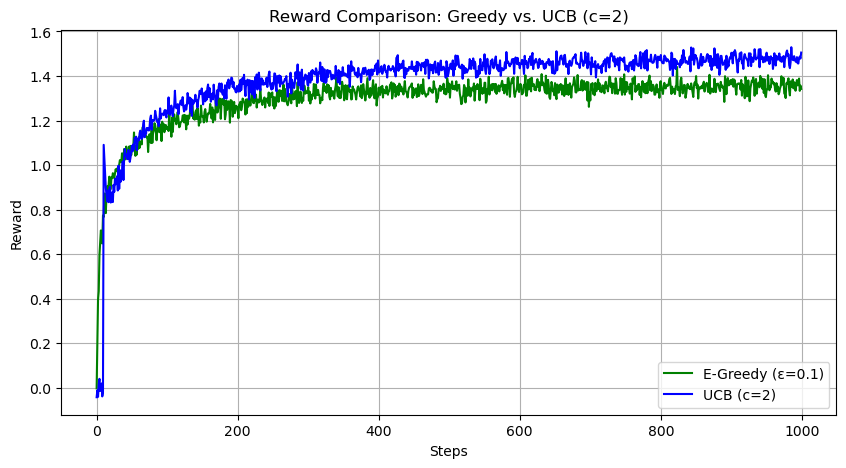

In [7]:
reward_list_e_greedy_ = [0 for _ in range(1000)]
optimal_action_e_greedy_ = [0 for _ in range(1000)]
error_list_e_greedy_ = [0 for _ in range(1000)]

reward_list_ucb_2 = [0 for _ in range(1000)]
optimal_action_ucb_2 = [0 for _ in range(1000)]
error_list_ucb_2 = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 0, 1)

    optimal_action = np.argmax(bandit)
    
    e_greedy_bandit_result_ = e_greedy(bandit, 1000, 0.1)
    reward_list_e_greedy_ = [a + b for a, b in zip(reward_list_e_greedy_, e_greedy_bandit_result_[1])]
    for j in range(len(e_greedy_bandit_result_[0])):
        if e_greedy_bandit_result_[0][j] == optimal_action:
            optimal_action_e_greedy_[j] += 1
    error_list_e_greedy_ = [(a + b) for a, b in zip(error_list_e_greedy_, e_greedy_bandit_result_[3])]
    
    ucb_2_result = ucb(bandit, 1000, 2)
    reward_list_ucb_2 = [a + b for a, b in zip(reward_list_ucb_2, ucb_2_result[1])]
    for j in range(len(ucb_2_result[0])):
        if ucb_2_result[0][j] == optimal_action:
            optimal_action_ucb_2[j] += 1
    error_list_ucb_2 = [(a + b) for a, b in zip(error_list_ucb_2, ucb_2_result[3])]
    
reward_list_e_greedy_ = [x / 2000 for x in reward_list_e_greedy_]
optimal_action_e_greedy_ = [x / 20 for x in optimal_action_e_greedy_]
reward_list_ucb_2 = [x / 2000 for x in reward_list_ucb_2]
optimal_action_ucb_2 = [x / 20 for x in optimal_action_ucb_2]

error_list_e_greedy_ = [x/2000 for x in error_list_e_greedy_]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(reward_list_ucb_2, color='blue', label='UCB (c=2)')
plt.title('Reward Comparison: Greedy vs. UCB (c=2)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(optimal_action_greedy, color='blue', label='Greedy')
# plt.plot(optimal_action_e_greedy, color='red', label='E-Greedy (ε=0.01)')
# plt.plot(optimal_action_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
# plt.title('Optimal Action Comparison: Greedy vs. E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1)')
# plt.xlabel('Steps')
# plt.ylabel('Optimal Action %')
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# plt.figure(figsize=(10, 5))
# plt.plot(error_list_greedy, color='blue', label='Greedy Estimates Error')
# plt.plot(error_list_e_greedy, color='red', label='E-Greedy (ε=0.01) Estimates Error')
# plt.plot(error_list_e_greedy_, color='green', label='E-Greedy (ε=0.1) Estimates Error')
# plt.title('Error Comparison: Greedy vs E-Greedy (ε=0.01) vs. E-Greedy (ε=0.1)')
# plt.xlabel('Steps')
# plt.ylabel('Average Error')
# plt.legend()
# plt.grid(True)
# plt.show()

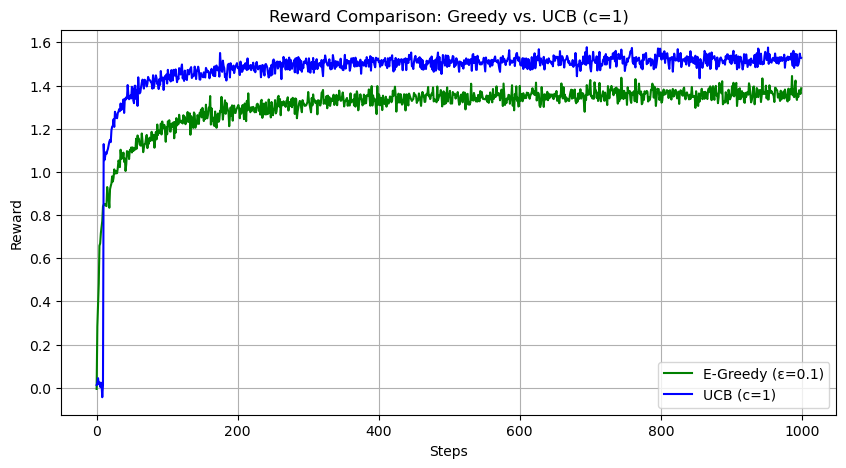

In [8]:
reward_list_e_greedy_ = [0 for _ in range(1000)]
optimal_action_e_greedy_ = [0 for _ in range(1000)]
error_list_e_greedy_ = [0 for _ in range(1000)]

reward_list_ucb_2 = [0 for _ in range(1000)]
optimal_action_ucb_2 = [0 for _ in range(1000)]
error_list_ucb_2 = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 0, 1)

    optimal_action = np.argmax(bandit)
    
    e_greedy_bandit_result_ = e_greedy(bandit, 1000, 0.1)
    reward_list_e_greedy_ = [a + b for a, b in zip(reward_list_e_greedy_, e_greedy_bandit_result_[1])]
    for j in range(len(e_greedy_bandit_result_[0])):
        if e_greedy_bandit_result_[0][j] == optimal_action:
            optimal_action_e_greedy_[j] += 1
    error_list_e_greedy_ = [(a + b) for a, b in zip(error_list_e_greedy_, e_greedy_bandit_result_[3])]
    
    ucb_2_result = ucb(bandit, 1000, 1)
    reward_list_ucb_2 = [a + b for a, b in zip(reward_list_ucb_2, ucb_2_result[1])]
    for j in range(len(ucb_2_result[0])):
        if ucb_2_result[0][j] == optimal_action:
            optimal_action_ucb_2[j] += 1
    error_list_ucb_2 = [(a + b) for a, b in zip(error_list_ucb_2, ucb_2_result[3])]
    
reward_list_e_greedy_ = [x / 2000 for x in reward_list_e_greedy_]
optimal_action_e_greedy_ = [x / 20 for x in optimal_action_e_greedy_]
reward_list_ucb_2 = [x / 2000 for x in reward_list_ucb_2]
optimal_action_ucb_2 = [x / 20 for x in optimal_action_ucb_2]

error_list_e_greedy_ = [x/2000 for x in error_list_e_greedy_]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(reward_list_ucb_2, color='blue', label='UCB (c=1)')
plt.title('Reward Comparison: Greedy vs. UCB (c=1)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

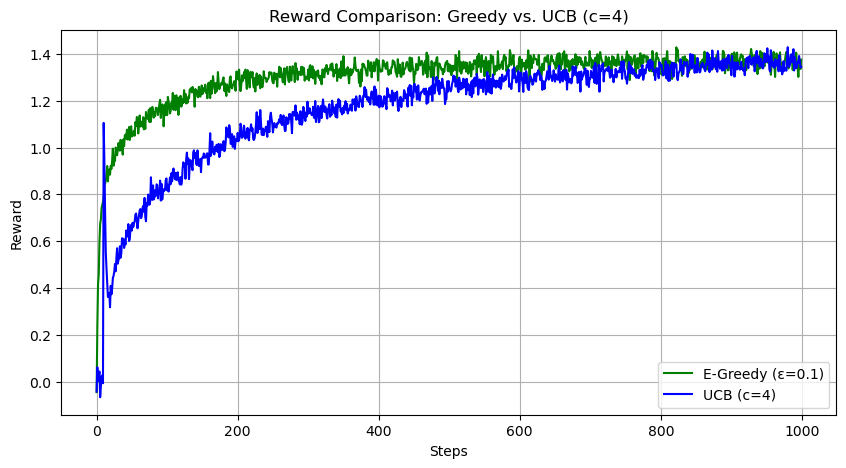

In [9]:
reward_list_e_greedy_ = [0 for _ in range(1000)]
optimal_action_e_greedy_ = [0 for _ in range(1000)]
error_list_e_greedy_ = [0 for _ in range(1000)]

reward_list_ucb_2 = [0 for _ in range(1000)]
optimal_action_ucb_2 = [0 for _ in range(1000)]
error_list_ucb_2 = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 0, 1)

    optimal_action = np.argmax(bandit)
    
    e_greedy_bandit_result_ = e_greedy(bandit, 1000, 0.1)
    reward_list_e_greedy_ = [a + b for a, b in zip(reward_list_e_greedy_, e_greedy_bandit_result_[1])]
    for j in range(len(e_greedy_bandit_result_[0])):
        if e_greedy_bandit_result_[0][j] == optimal_action:
            optimal_action_e_greedy_[j] += 1
    error_list_e_greedy_ = [(a + b) for a, b in zip(error_list_e_greedy_, e_greedy_bandit_result_[3])]
    
    ucb_2_result = ucb(bandit, 1000, 4)
    reward_list_ucb_2 = [a + b for a, b in zip(reward_list_ucb_2, ucb_2_result[1])]
    for j in range(len(ucb_2_result[0])):
        if ucb_2_result[0][j] == optimal_action:
            optimal_action_ucb_2[j] += 1
    error_list_ucb_2 = [(a + b) for a, b in zip(error_list_ucb_2, ucb_2_result[3])]
    
reward_list_e_greedy_ = [x / 2000 for x in reward_list_e_greedy_]
optimal_action_e_greedy_ = [x / 20 for x in optimal_action_e_greedy_]
reward_list_ucb_2 = [x / 2000 for x in reward_list_ucb_2]
optimal_action_ucb_2 = [x / 20 for x in optimal_action_ucb_2]

error_list_e_greedy_ = [x/2000 for x in error_list_e_greedy_]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_e_greedy_, color='green', label='E-Greedy (ε=0.1)')
plt.plot(reward_list_ucb_2, color='blue', label='UCB (c=4)')
plt.title('Reward Comparison: Greedy vs. UCB (c=4)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

Q7

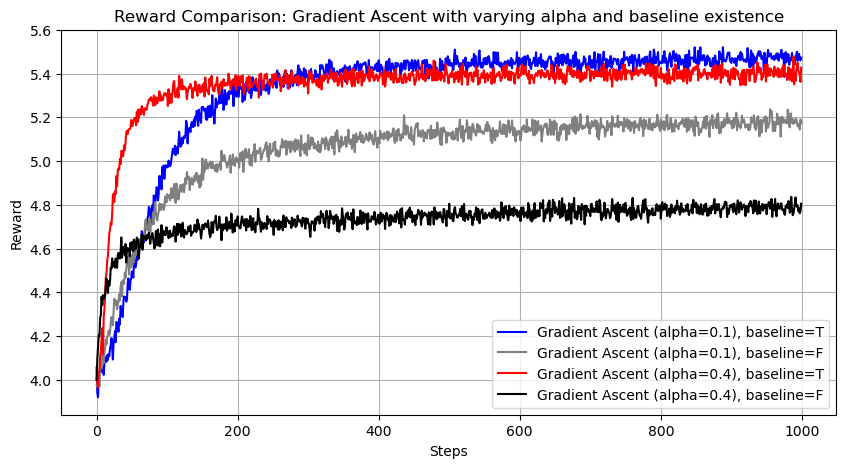

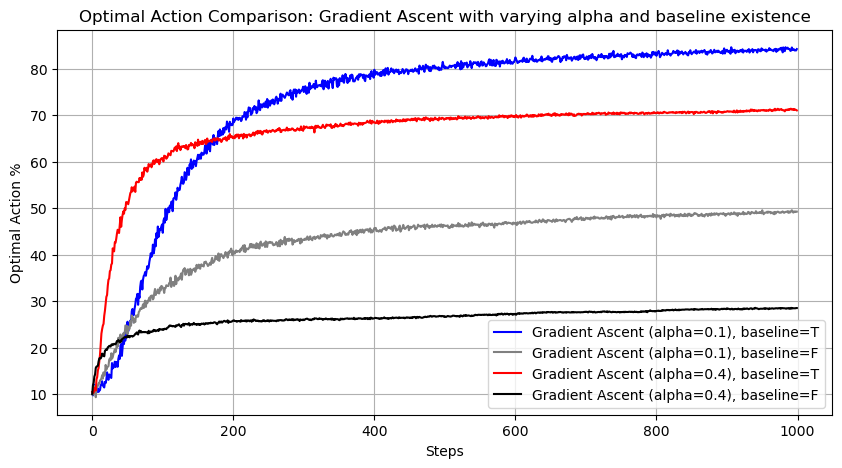

In [25]:
reward_list_gradient_descent_1 = [0 for _ in range(1000)]
optimal_action_gradient_descent_1 = [0 for _ in range(1000)]

reward_list_gradient_descent_2 = [0 for _ in range(1000)]
optimal_action_gradient_descent_2 = [0 for _ in range(1000)]

reward_list_gradient_descent_3 = [0 for _ in range(1000)]
optimal_action_gradient_descent_3 = [0 for _ in range(1000)]

reward_list_gradient_descent_4 = [0 for _ in range(1000)]
optimal_action_gradient_descent_4 = [0 for _ in range(1000)]

for i in range(2000):
    bandit = generate_n_armed_bandit_task(10, 4, 1)

    optimal_action = np.argmax(bandit)
    
    gradient_descent_1_result = gradient_ascent(bandit, 1000, 0.1, True)
    reward_list_gradient_descent_1 = [a + b for a, b in zip(reward_list_gradient_descent_1, gradient_descent_1_result[1])]
    for j in range(len(gradient_descent_1_result[0])):
        if gradient_descent_1_result[0][j] == optimal_action:
            optimal_action_gradient_descent_1[j] += 1
            
    gradient_descent_2_result = gradient_ascent(bandit, 1000, 0.1, False)
    reward_list_gradient_descent_2 = [a + b for a, b in zip(reward_list_gradient_descent_2, gradient_descent_2_result[1])]
    for j in range(len(gradient_descent_2_result[0])):
        if gradient_descent_2_result[0][j] == optimal_action:
            optimal_action_gradient_descent_2[j] += 1
            
    gradient_descent_3_result = gradient_ascent(bandit, 1000, 0.4, True)
    reward_list_gradient_descent_3 = [a + b for a, b in zip(reward_list_gradient_descent_3, gradient_descent_3_result[1])]
    for j in range(len(gradient_descent_3_result[0])):
        if gradient_descent_3_result[0][j] == optimal_action:
            optimal_action_gradient_descent_3[j] += 1
            
    gradient_descent_4_result = gradient_ascent(bandit, 1000, 0.4, False)
    reward_list_gradient_descent_4 = [a + b for a, b in zip(reward_list_gradient_descent_4, gradient_descent_4_result[1])]
    for j in range(len(gradient_descent_4_result[0])):
        if gradient_descent_4_result[0][j] == optimal_action:
            optimal_action_gradient_descent_4[j] += 1
            
reward_list_gradient_descent_1 = [x / 2000 for x in reward_list_gradient_descent_1]
optimal_action_gradient_descent_1 = [x / 20 for x in optimal_action_gradient_descent_1]

reward_list_gradient_descent_2 = [x / 2000 for x in reward_list_gradient_descent_2]
optimal_action_gradient_descent_2 = [x / 20 for x in optimal_action_gradient_descent_2]

reward_list_gradient_descent_3 = [x / 2000 for x in reward_list_gradient_descent_3]
optimal_action_gradient_descent_3 = [x / 20 for x in optimal_action_gradient_descent_3]

reward_list_gradient_descent_4 = [x / 2000 for x in reward_list_gradient_descent_4]
optimal_action_gradient_descent_4 = [x / 20 for x in optimal_action_gradient_descent_4]

plt.figure(figsize=(10, 5))
plt.plot(reward_list_gradient_descent_1, color='blue', label='Gradient Ascent (alpha=0.1), baseline=T')
plt.plot(reward_list_gradient_descent_2, color='grey', label='Gradient Ascent (alpha=0.1), baseline=F')
plt.plot(reward_list_gradient_descent_3, color='red', label='Gradient Ascent (alpha=0.4), baseline=T')
plt.plot(reward_list_gradient_descent_4, color='black', label='Gradient Ascent (alpha=0.4), baseline=F')
plt.title('Reward Comparison: Gradient Ascent with varying alpha and baseline existence')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(optimal_action_gradient_descent_1, color='blue', label='Gradient Ascent (alpha=0.1), baseline=T')
plt.plot(optimal_action_gradient_descent_2, color='grey', label='Gradient Ascent (alpha=0.1), baseline=F')
plt.plot(optimal_action_gradient_descent_3, color='red', label='Gradient Ascent (alpha=0.4), baseline=T')
plt.plot(optimal_action_gradient_descent_4, color='black', label='Gradient Ascent (alpha=0.4), baseline=F')
plt.title('Optimal Action Comparison: Gradient Ascent with varying alpha and baseline existence')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)
plt.show()